In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("D:\\PG-DBDA\\R project\\PG-DBDA 2022\\iris.csv")

In [3]:
from sklearn.neighbors import KNeighborsClassifier


In [4]:
X = df.drop('Species', axis=1)
y = df.Species

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=0)  

In [6]:
from sklearn.preprocessing import StandardScaler    
st_X= StandardScaler()    
X_train= st_X.fit_transform(X_train)    
X_test= st_X.transform(X_test)  

In [9]:
k_list=[]


In [10]:
#Fitting K-NN classifier to the training set 
from sklearn.metrics import confusion_matrix  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score
for i in range(1,15):
    classifier= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    cm= confusion_matrix(y_test, y_pred)  
    accuracy = accuracy_score(y_test, y_pred)*100
    k_list.append(accuracy)

In [11]:


print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [12]:
k_list

[93.33333333333333,
 96.66666666666667,
 96.66666666666667,
 96.66666666666667,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

# validation

In [40]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

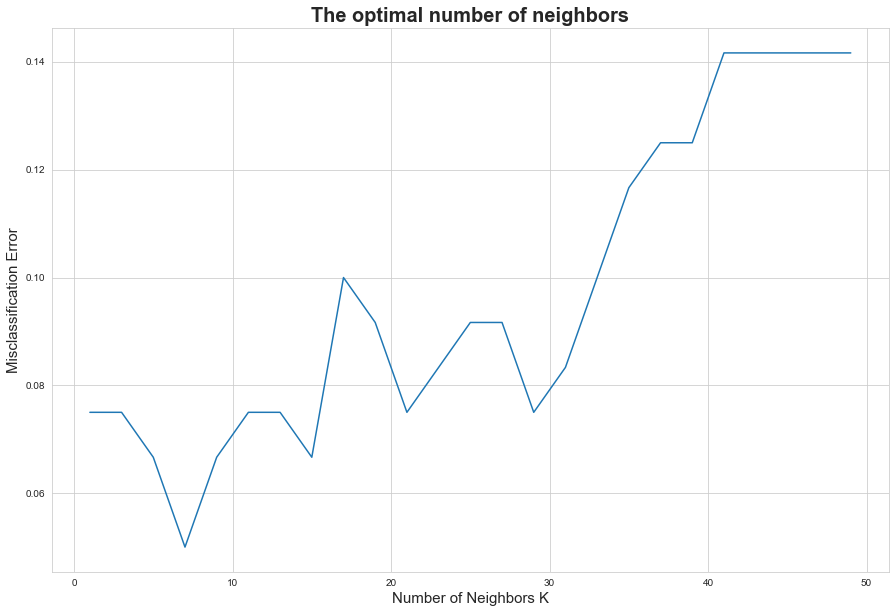

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [42]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.
